Profile data saved to public_instagram_profiles_details.csv
      username            full_name   
0       natgeo  National Geographic  \
1         nasa                 NASA   
2      therock       Dwayne Johnson   
3      beyonce             Beyoncé   
4  virat.kohli          Virat Kohli   

                                           biography   
0               Inspiring the explorer in everyone 🌎  \
1  🚀 🌎  Exploring the universe and our home plane...   
2  builder of stuff\ncheat meal crusher \ntequila...   
3    act iiㅤ ㅤ         COWBOY CARTER ㅤ       out now   
4                                         Carpediem!   

                      external_url  followers_count  following_count   
0  https://on.natgeo.com/instagram        282471744              162  \
1            https://www.nasa.gov/         97612040               77   
2          http://therock.komi.io/        396602301                0   
3         https://www.beyonce.com/        317584755                1   
4       

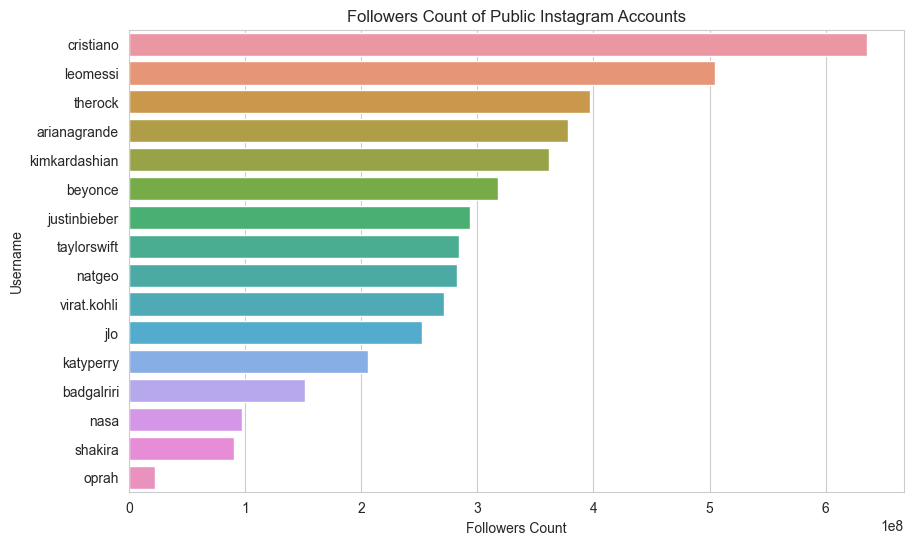

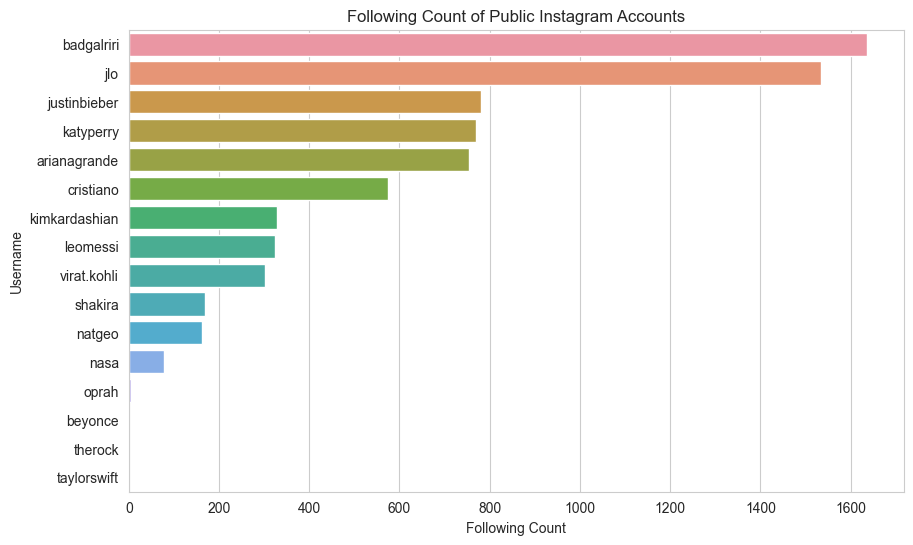

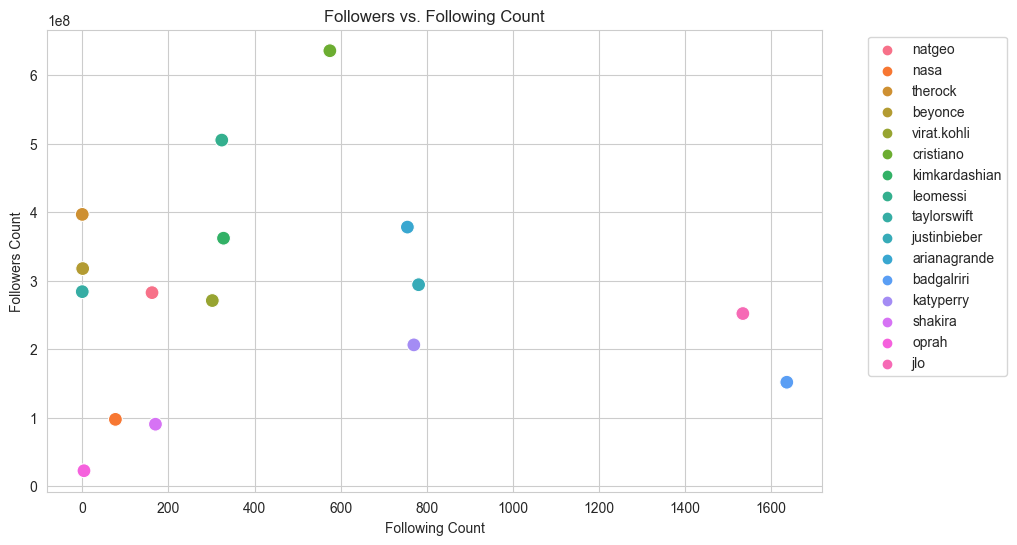

       followers_count  following_count   posts_count
count     1.600000e+01        16.000000     16.000000
mean      2.841716e+08       463.687500   4827.125000
std       1.562704e+08       520.123026   6995.790066
min       2.268868e+07         0.000000    219.000000
25%       1.926322e+08        58.750000   1400.000000
50%       2.831868e+08       313.000000   2368.000000
75%       3.659430e+08       758.750000   5266.750000
max       6.353632e+08      1636.000000  29485.000000


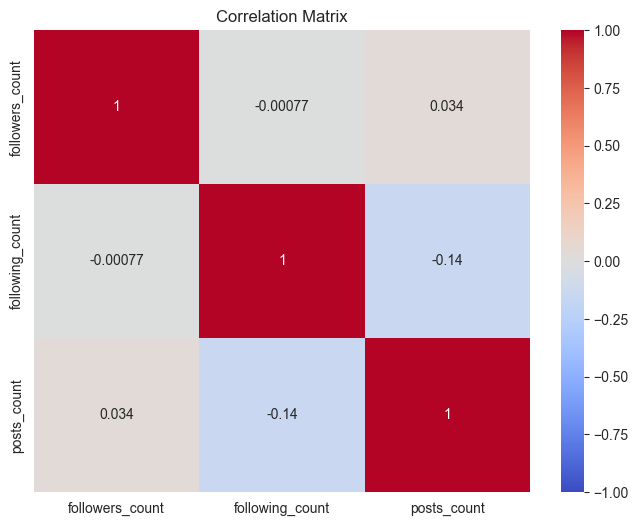

Mean Absolute Error: 239441759.64686638
Mean Squared Error: 6.744445700458158e+16
R-squared: -0.2038916199006917


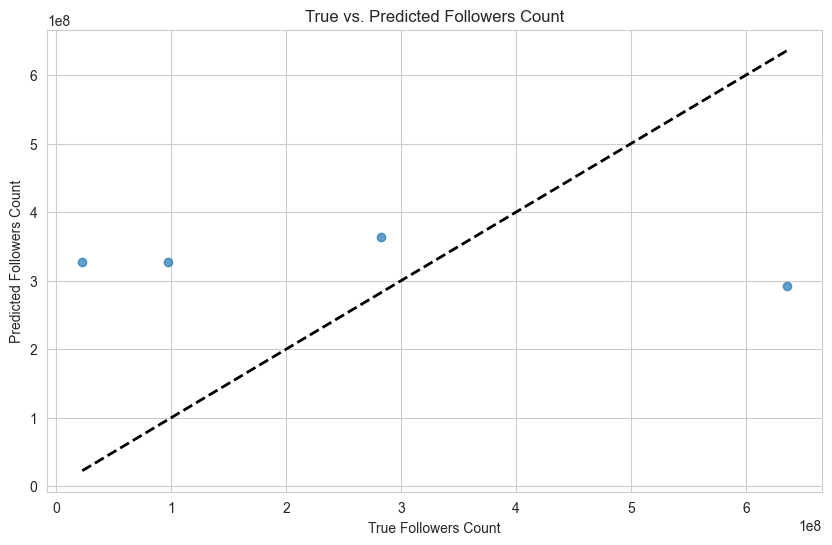

In [2]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Function to fetch profile details
def fetch_profile_details(username):
    L = instaloader.Instaloader()
    profile = instaloader.Profile.from_username(L.context, username)
    profile_details = {
        "username": profile.username,
        "full_name": profile.full_name,
        "biography": profile.biography,
        "external_url": profile.external_url,
        "followers_count": profile.followers,
        "following_count": profile.followees,
        "posts_count": profile.mediacount,
    }
    return profile_details

# List of public Instagram usernames
usernames = [
    'natgeo', 'nasa', 'therock', 'beyonce', 
    'virat.kohli', 'cristiano', 'kimkardashian',
    'leomessi', 'taylorswift', 'justinbieber',
    'arianagrande', 'badgalriri', 'katyperry',
    'shakira', 'oprah', 'jlo'
]

# Initialize an empty list to store profile details
profiles_data = []

# Fetch details for each username
for username in usernames:
    try:
        profile_details = fetch_profile_details(username)
        profiles_data.append(profile_details)
    except instaloader.exceptions.ProfileNotExistsException:
        print(f"Profile {username} does not exist.")
    except Exception as e:
        print(f"An error occurred while fetching data for {username}: {e}")

# Convert the list of dictionaries to a pandas DataFrame
profiles_df = pd.DataFrame(profiles_data)

# Save the DataFrame to a CSV file
profiles_df.to_csv('public_instagram_profiles_details.csv', index=False)
print("Profile data saved to public_instagram_profiles_details.csv")
profiles_df
# Display the first few rows of the dataframe
print(profiles_df.head())

# Visualize the Data

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar plot of followers count
plt.figure(figsize=(10, 6))
sns.barplot(x='followers_count', y='username', data=profiles_df.sort_values(by='followers_count', ascending=False))
plt.title('Followers Count of Public Instagram Accounts')
plt.xlabel('Followers Count')
plt.ylabel('Username')
plt.show()

# Bar plot of following count
plt.figure(figsize=(10, 6))
sns.barplot(x='following_count', y='username', data=profiles_df.sort_values(by='following_count', ascending=False))
plt.title('Following Count of Public Instagram Accounts')
plt.xlabel('Following Count')
plt.ylabel('Username')
plt.show()

# Scatter plot of followers vs. following
plt.figure(figsize=(10, 6))
sns.scatterplot(x='following_count', y='followers_count', data=profiles_df, hue='username', s=100)
plt.title('Followers vs. Following Count')
plt.xlabel('Following Count')
plt.ylabel('Followers Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Analyze the Data

# Descriptive statistics
print(profiles_df.describe())

# Correlation analysis
correlation_matrix = profiles_df[['followers_count', 'following_count', 'posts_count']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Simple Machine Learning Model

# Prepare the Data
X = profiles_df[['following_count', 'posts_count']]
y = profiles_df['followers_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the Model's Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('True vs. Predicted Followers Count')
plt.xlabel('True Followers Count')
plt.ylabel('Predicted Followers Count')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [3]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Function to fetch profile details
def fetch_profile_details(username):
    L = instaloader.Instaloader()
    profile = instaloader.Profile.from_username(L.context, username)
    profile_details = {
        "username": profile.username,
        "full_name": profile.full_name,
        "biography": profile.biography,
        "external_url": profile.external_url,
        "followers_count": profile.followers,
        "following_count": profile.followees,
        "posts_count": profile.mediacount,
    }
    return profile_details

# List of public Instagram usernames
usernames = [
    'natgeo', 'nasa', 'therock', 'beyonce', 
    'virat.kohli', 'cristiano', 'kimkardashian',
    'leomessi', 'taylorswift', 'justinbieber',
    'arianagrande', 'badgalriri', 'katyperry',
    'shakira', 'oprah', 'jlo'
]

# Initialize an empty list to store profile details
profiles_data = []

# Fetch details for each username
for username in usernames:
    try:
        profile_details = fetch_profile_details(username)
        profiles_data.append(profile_details)
    except instaloader.exceptions.ProfileNotExistsException:
        print(f"Profile {username} does not exist.")
    except Exception as e:
        print(f"An error occurred while fetching data for {username}: {e}")

# Convert the list of dictionaries to a pandas DataFrame
profiles_df = pd.DataFrame(profiles_data)

# Save the DataFrame to a CSV file
profiles_df.to_csv('public_instagram_profiles_details.csv', index=False)
print("Profile data saved to public_instagram_profiles_details.csv")
profiles_df

Profile data saved to public_instagram_profiles_details.csv


,username,full_name,biography,external_url,followers_count,following_count,posts_count
0,natgeo,National Geographic,Inspiring the explorer in everyone 🌎,https://on.natgeo.com/instagram,282471711,162,29485
1,nasa,NASA,🚀 🌎 Exploring the universe and our home plane...,https://www.nasa.gov/,97612038,77,4247
2,therock,Dwayne Johnson,builder of stuff\ncheat meal crusher \ntequila...,http://therock.komi.io/,396602242,0,7844
3,beyonce,Beyoncé,act iiㅤ ㅤ COWBOY CARTER ㅤ out now,https://www.beyonce.com/,317584719,1,2310
4,virat.kohli,Virat Kohli,Carpediem!,None,270926984,302,1702
5,cristiano,Cristiano Ronaldo,Get @WHOOP now at,https://bit.ly/whoopxcr7,635363112,575,3720
6,kimkardashian,Kim Kardashian,@SKIMS @SKKN @SKKYPARTNERS,https://skims.social/shop-skims,361889750,328,6238
7,leomessi,Leo Messi,Bienvenidos a la cuenta oficial de Instagram d...,http://themessiexperience.com/,505008751,324,1241
8,taylorswift,Taylor Swift,All’s fair in love and poetry... New album THE...,http://taylorswift.com/,283901816,0,664
9,justinbieber,Justin Bieber,JUSTICE the album out now\n@drewhouse,https://churcho.me/3T9o6dF,294040026,781,7511
